# Summary

Techniques below include csv read in, data cleaning, sorting, summarizing, filtering (include and exclude strings), pivot tables, histograms, z-score analysis, correlation matrix, and meta data creation.  Eventually the data will be used to build a machine learning algorithm to predict Type1 and/or Type2 based on stats.  

In [51]:
#First I import Python the libraries and data that will be used.  Any additional libraries can be added as needed.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import csv
import sys
import operator
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.externals import joblib
import seaborn as sb
pokemon = pd.read_csv("Pokemon.csv")

In [2]:
#Increases width of Jupyter notebook display.
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

# Snapshot
Here is a quick snapshot of the data and summary statistics to get an idea of what type of dataframe we are working with.

In [3]:
#Snapshot view of the data.
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
#Summary of the data.
pokemon.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


# Cleaning
Next we need to fix some of the column names to remove spaces and or periods.  This allows future data calls to work properly.  First is a call to the column names before renaming, then another call after they are renamed to ensure they have changed.

In [5]:
#Column names before renaming.
pokemon.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [6]:
#Changing column names to remove problematic characters for future data calls.  Problematic characters such as a period or space.
pokemon.rename(columns = {"Type 1" : "Type1", "Type 2" : "Type2", "Sp. Atk" : "Sp_Attack", "Sp. Def" : "Sp_Def" }, inplace = True)

In [7]:
#Column names after renaming.
pokemon.columns

Index(['#', 'Name', 'Type1', 'Type2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp_Attack', 'Sp_Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

# Pivot Tables
The first thing I want to see are stat numbers by Type1 and Type2.  This will be color coded - blue being low and red being high.  I want to see the average and standard deviation of each stat by every Type.  Also, I might need to know the count of Types.  What we might recognize from this pivot table is that Steel/Ground and Rock/Ground types have high Defense.  In order to condense the pivot table we will visualize Type1 and Type2 both together and individually. 

Other aggregate functions can be added to these pivot tables to see median, max, min, and more.  Find other aggregate functions here. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html

In [49]:
#Showing the stat levels of pokemon based on Type1 and Type2.  Note this is slow to load in.
pd.pivot_table(pokemon, ['Attack', "Defense", 'HP', 'Sp_Attack', 'Sp_Def', 'Speed'], ['Type1', 'Type2'], aggfunc = [np.mean, np.std, len]).style.background_gradient(cmap = "coolwarm")

In [9]:
#Showing the stat levels of pokemon based on Type1.
pd.pivot_table(pokemon, ['Attack', "Defense", 'HP', 'Sp_Attack', 'Sp_Def', 'Speed'], ['Type1'], aggfunc = [np.mean, np.std, len]).style.background_gradient(cmap = "coolwarm")

In [10]:
#Showing the stat levels of pokemon based on Type2.
pd.pivot_table(pokemon, ['Attack', "Defense", 'HP', 'Sp_Attack', 'Sp_Def', 'Speed'], ['Type2'], aggfunc = [np.mean, np.std, len]).style.background_gradient(cmap = "coolwarm")

Next I can visualize the pivot table data as a bar chart.  First we will show Type1 and then Type2.  Combined the chart is too messy and can't be read properly.  The figure size is increased for visual clarity.  For now it will just show stats based on the mean.  But just as there were different aggregate functions on the pivot tables, the function here can be changed.

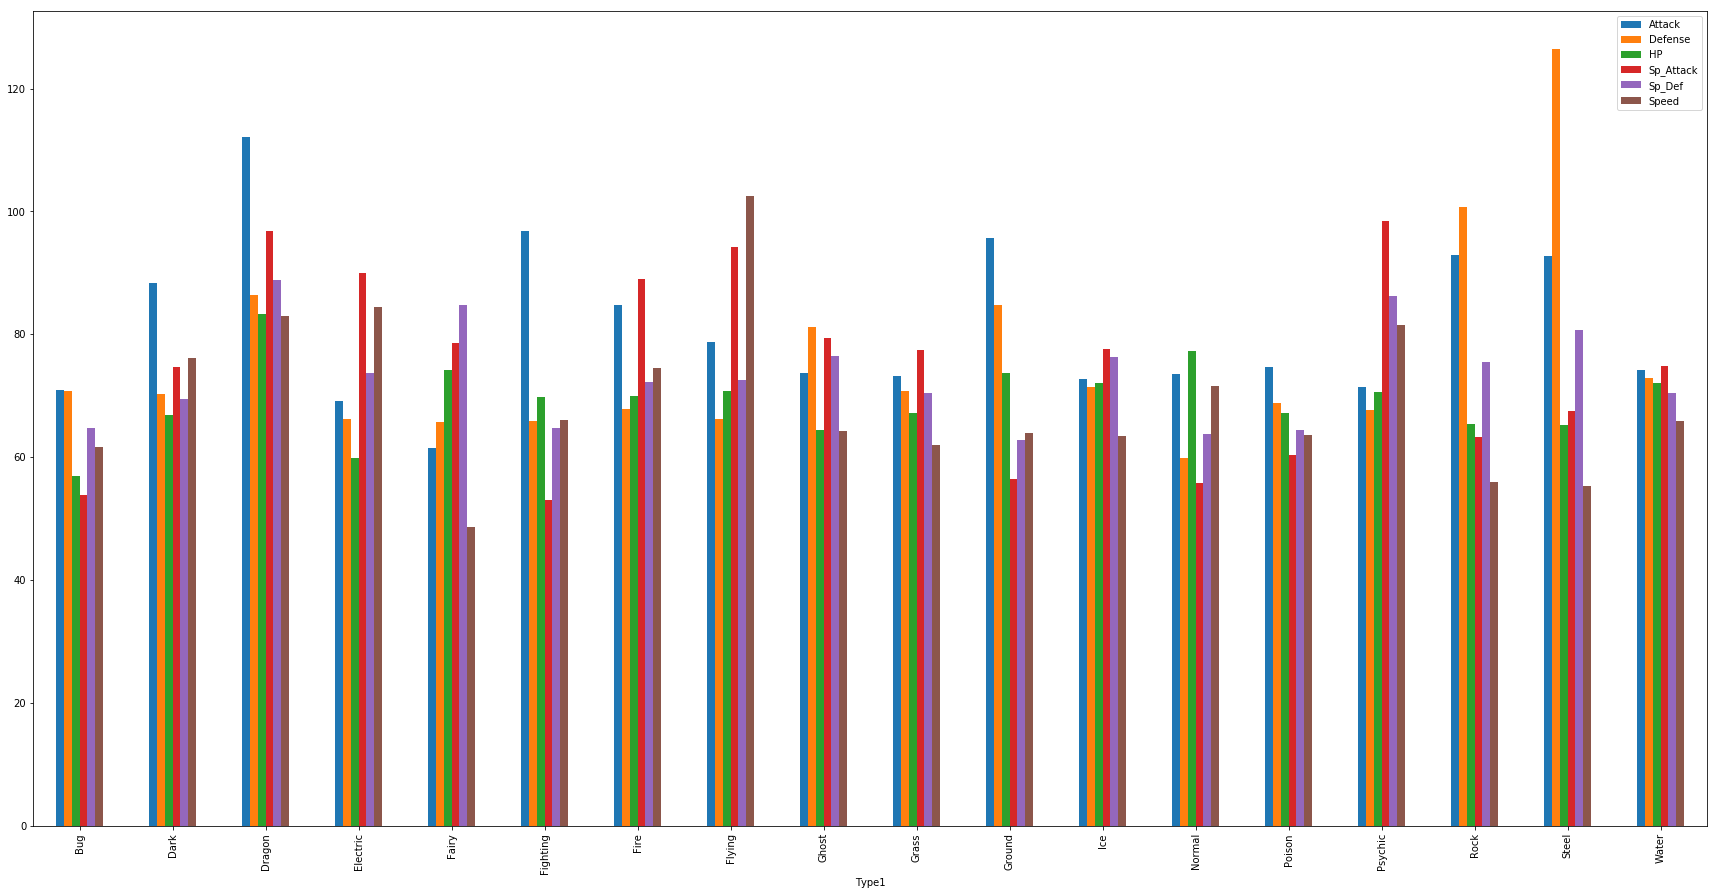

In [11]:
pd.pivot_table(pokemon, ['Attack', "Defense", 'HP', 'Sp_Attack', 'Sp_Def', 'Speed'], ['Type1']).plot(kind = 'bar', figsize = (30,15))

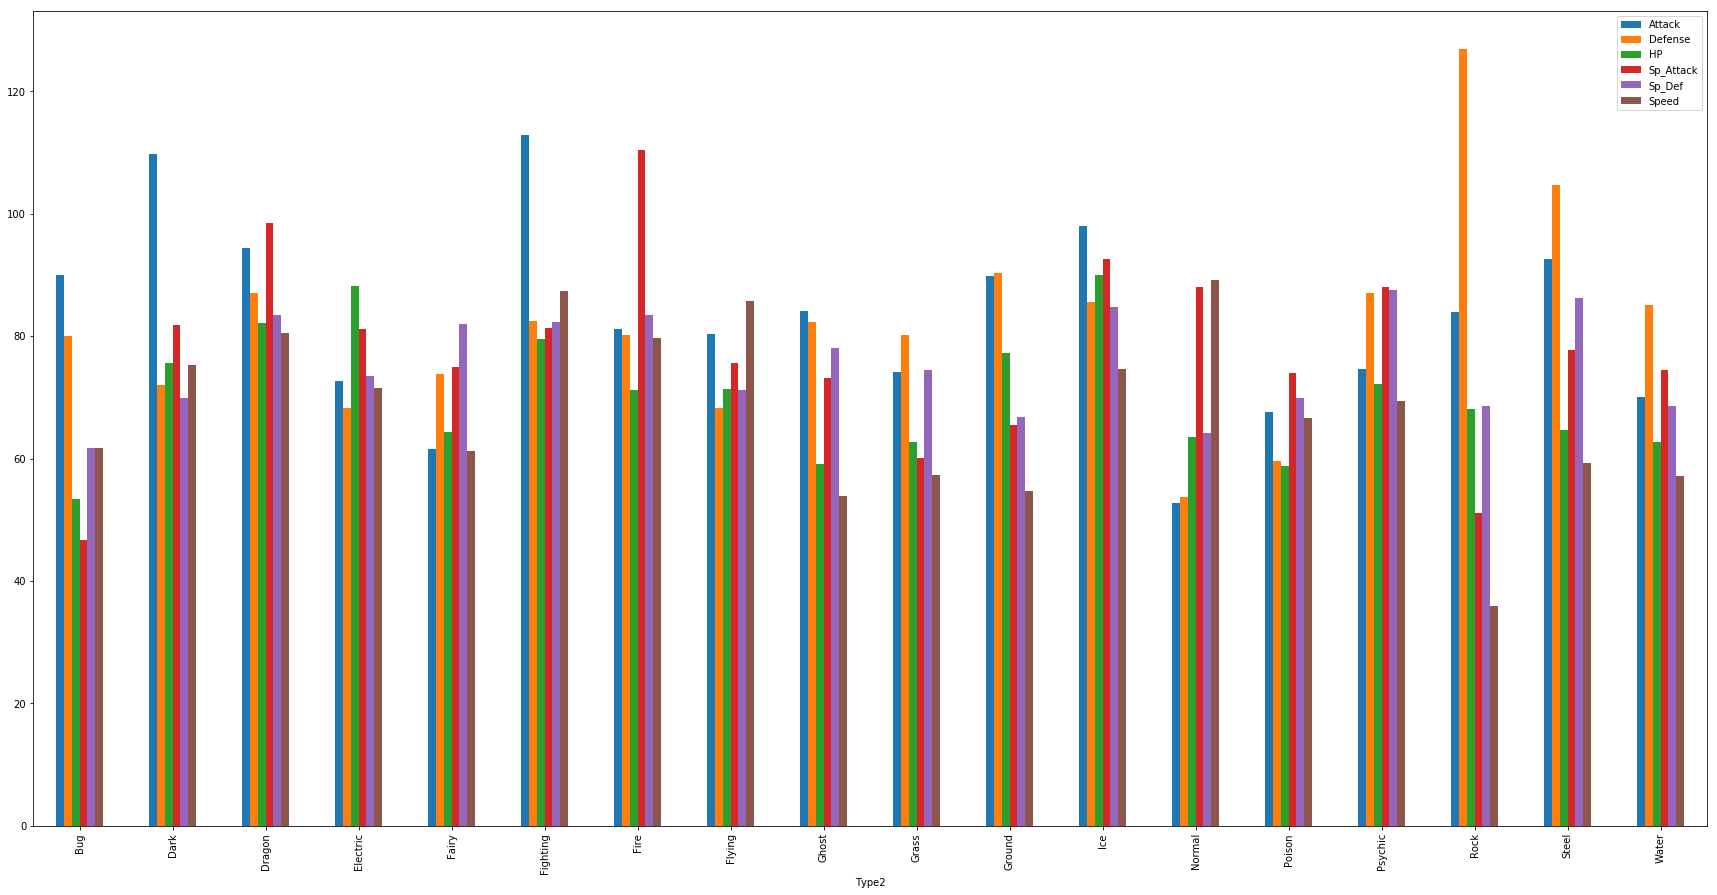

In [12]:
pivot = pd.pivot_table(pokemon, ['Attack', "Defense", 'HP', 'Sp_Attack', 'Sp_Def', 'Speed'], ['Type2']).plot(kind = 'bar', figsize = (30,15))

# Histogram
Here I want to build a histogram to see the distribution of each stat, regardless of type.  What this might show is that there are very fewPokemon with stats above 200.  But this opens a question... which Pokemon might those be?  After showing the distribution of stats for all Pokemon, I want to see the difference in distribution between legendary and non-legendary Pokemon.  That might show us the those Pokemon with stats above 200.

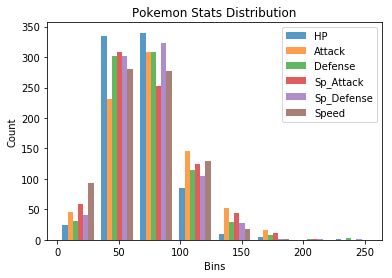

In [13]:
#All pokemon histogram.
stat_hist = plt.hist([pokemon.HP, pokemon.Attack, pokemon.Defense, pokemon.Sp_Attack, pokemon.Sp_Def, pokemon.Speed], alpha = .75, bins = 8, label = ['HP', 'Attack', 'Defense', 'Sp_Attack', 'Sp_Defense', 'Speed'])
plt.title('Pokemon Stats Distribution')
plt.xlabel('Bins')
plt.ylabel('Count')
plt.legend()

To split out the legendary Pokemon, I'll first filter them out into a new dataframe called 'legendaries'.  This is done by using the Legendary column and locating all that are a True value.  On the flip side, I'll also create a dataframe that are non-legendaries.  Once the dataframes are created, two more histograms can be created for comparison.  The legendaries stat distribution doesn't show any Pokemon with stats above 200, but it does show us that they have higher stats.

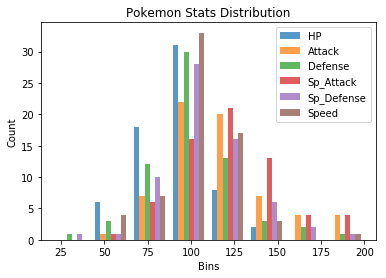

In [14]:
#Legendary pokemon dataframe and histogram.
legendaries = pokemon.loc[pokemon['Legendary'] == True]
stat_hist_legendaries = plt.hist([legendaries.HP, legendaries.Attack, legendaries.Defense, legendaries.Sp_Attack, legendaries.Sp_Def, legendaries.Speed], alpha = .75, bins = 8, label = ['HP', 'Attack', 'Defense', 'Sp_Attack', 'Sp_Defense', 'Speed'])
plt.title('Pokemon Stats Distribution')
plt.xlabel('Bins')
plt.ylabel('Count')
plt.legend()

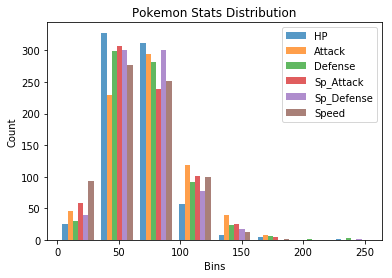

In [15]:
#Non-legendary pokemon dataframe and histogram.
non_legendaries = pokemon.loc[pokemon['Legendary'] == False]
stat_hist_non_legendaries = plt.hist([non_legendaries.HP, non_legendaries.Attack, non_legendaries.Defense, non_legendaries.Sp_Attack, non_legendaries.Sp_Def, non_legendaries.Speed], alpha = .75, bins = 8, label = ['HP', 'Attack', 'Defense', 'Sp_Attack', 'Sp_Defense', 'Speed'])
plt.title('Pokemon Stats Distribution')
plt.xlabel('Bins')
plt.ylabel('Count')
plt.legend()

From the two histograms we can see that the legendary Pokemon do have a higher stats average.  However, none of them are above 200.  So in the non-legendary pokemon, there seem to be a handful of Pokemon with lop-sided stat distributions.  They might have a high Defense, but all their other stats are low as a balance.

# Bar Chart
Next is a bar chart to visualize count of Pokemon by Type1 and Type2.  This shows that there are a lot of Water and Normal Pokemon, as well as many with the Type2 Flying.  

Text(0.5, 1.0, 'Pokemon Type1 Count')

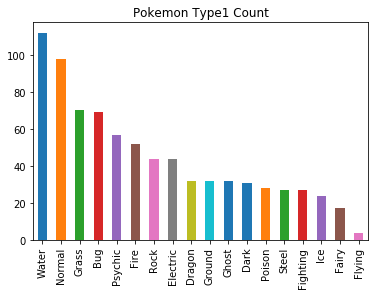

In [16]:
#Bar plot of pokemon by Type1.
pd.Series(pokemon.Type1).value_counts().plot("bar")
plt.title('Pokemon Type1 Count')

Text(0.5, 1.0, 'Pokemon Type2 Count')

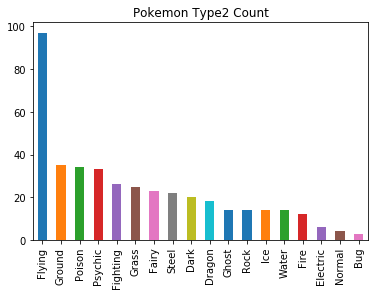

In [17]:
#Bar plot of pokemon by Type2.
pd.Series(pokemon.Type2).value_counts().plot("bar")
plt.title('Pokemon Type2 Count')

# Correlation Matrix
My favorite analysis to create and dig into is a correlation matrix.  This shows the correlation of each data column against every other data column.  Here it shows that there is a slightly over a .51 correlation between Defense and Special Defense.  This is the highest individual stat to stat correlation, showing that if a a Pokemon has a high Defense or Special Defense, the other is likely high (relative to the other stat to stat correlations shown).

In [18]:
#Correlation matrix of all values.
correlation = pokemon.corr()
correlation.style.background_gradient(cmap = "coolwarm")

,#,Total,HP,Attack,Defense,Sp_Attack,Sp_Def,Speed,Generation,Legendary
#,1,0.119813,0.0976139,0.102298,0.0947858,0.0887589,0.0858165,0.0107335,0.982516,0.153396
Total,0.119813,1,0.618748,0.736211,0.612787,0.74725,0.717609,0.575943,0.048384,0.501758
HP,0.0976139,0.618748,1,0.422386,0.239622,0.36238,0.378718,0.175952,0.0586825,0.27362
Attack,0.102298,0.736211,0.422386,1,0.438687,0.396362,0.26399,0.38124,0.0514513,0.345408
Defense,0.0947858,0.612787,0.239622,0.438687,1,0.223549,0.510747,0.0152266,0.0424186,0.246377
Sp_Attack,0.0887589,0.74725,0.36238,0.396362,0.223549,1,0.506121,0.473018,0.0364368,0.448907
Sp_Def,0.0858165,0.717609,0.378718,0.26399,0.510747,0.506121,1,0.259133,0.028486,0.363937
Speed,0.0107335,0.575943,0.175952,0.38124,0.0152266,0.473018,0.259133,1,-0.0231211,0.326715
Generation,0.982516,0.048384,0.0586825,0.0514513,0.0424186,0.0364368,0.028486,-0.0231211,1,0.0797936
Legendary,0.153396,0.501758,0.27362,0.345408,0.246377,0.448907,0.363937,0.326715,0.0797936,1


# Metadata Creation
### Z-Score Analysis
To begin building out a performance metric to rank each Pokemon, I need to create new columns of data.  The new columns of data will be the z-scores of each stat.  Summing these z-scores will give us a total 'stat_score' to rank each Pokemon.  This will be slightly different than ranking by the Total column as each stat has it's own distribution, making some stats weigh heavier than others when performing a z-score analysis.

Z-score is measure of how many standard deviations above or below the mean your data point is. More can be found at this link, and the formula is below. https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/z-score/
z = (x – μ) / σ

In [19]:
#Adding a new column to calculate the sum of z-scores of all stats.  These scores will be used to rank each Pokemon.
pokemon["HP_Score"] = (((pokemon.HP - np.mean(pokemon.HP)) / np.std(pokemon.HP)))
pokemon["Attack_Score"] = (((pokemon.Attack - np.mean(pokemon.Attack)) / np.std(pokemon.Attack)))
pokemon["Defense_Score"] = (((pokemon.Defense - np.mean(pokemon.Defense)) / np.std(pokemon.Defense)))
pokemon["Sp_Attack_Score"] = (((pokemon.Sp_Attack - np.mean(pokemon.Sp_Attack)) / np.std(pokemon.Sp_Attack)))
pokemon["Sp_Def_Score"] = (((pokemon.Sp_Def - np.mean(pokemon.Sp_Def)) / np.std(pokemon.Sp_Def)))
pokemon["Speed_Score"] = (((pokemon.Speed - np.mean(pokemon.Speed)) / np.std(pokemon.Speed)))
pokemon["Stat_Score"] = pokemon.HP_Score + pokemon.Attack_Score + pokemon.Defense_Score + pokemon.Sp_Attack_Score + pokemon.Sp_Def_Score + pokemon.Speed_Score
pokemon

,#,Name,Type1,Type2,Total,HP,Attack,Defense,Sp_Attack,Sp_Def,Speed,Generation,Legendary,HP_Score,Attack_Score,Defense_Score,Sp_Attack_Score,Sp_Def_Score,Speed_Score,Stat_Score
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503,-3.961508
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,-0.362822,-0.524130,-0.347917,0.219560,0.291156,-0.285015,-1.009169
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,0.420917,0.092448,0.293849,0.831146,1.010283,0.403635,3.052278
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,0.420917,0.647369,1.577381,1.503891,1.729409,0.403635,6.282602
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,-1.185748,-0.832419,-0.989683,-0.392027,-0.787533,-0.112853,-4.300264
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,-0.441196,-0.462472,-0.508359,0.219560,-0.248189,0.403635,-1.037021
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,0.342543,0.154106,0.133407,1.106360,0.470938,1.092286,3.299640
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False,0.342543,1.572236,1.192321,1.748526,0.470938,1.092286,6.418850
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False,0.342543,0.770685,0.133407,2.635326,1.549628,1.092286,6.523874
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False,-0.989813,-0.955735,-0.283741,-0.697820,-0.284145,-0.870368,-4.081622


### Stat Summary
Next I'm creating more new metadata to utilize for a Pokedex type function.  I want to see the highest individual stat, average stat value, and stat standard deviation.

In [42]:
#Adding a TopStat, StatAvg, and StatStdDev column to see each Pokemon's highest stat by name, average of all stats, and standard deviation of stats.
pokemon['TopStat'] = pokemon.loc[:, 'HP':'Speed'].apply(np.argmax, axis = 1)
pokemon['BottomStat'] = pokemon.loc[:, 'HP':'Speed'].apply(np.argmin, axis = 1)
pokemon['StatAvg'] = pokemon.loc[:, 'HP':'Speed'].mean(axis = 1)
pokemon['StatStdDev'] = pokemon.loc[:, 'HP':'Speed'].std(axis = 1)
pokemon

,#,Name,Type1,Type2,Total,HP,Attack,Defense,Sp_Attack,Sp_Def,...,Attack_Score,Defense_Score,Sp_Attack_Score,Sp_Def_Score,Speed_Score,Stat_Score,TopStat,BottomStat,StatAvg,StatStdDev
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503,-3.961508,Sp_Attack,HP,53.000000,9.465728
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,-0.524130,-0.347917,0.219560,0.291156,-0.285015,-1.009169,Sp_Attack,HP,67.500000,9.751923
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,0.092448,0.293849,0.831146,1.010283,0.403635,3.052278,Sp_Attack,HP,87.500000,9.751923
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,0.647369,1.577381,1.503891,1.729409,0.403635,6.282602,Defense,HP,104.166667,20.536959
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,-0.832419,-0.989683,-0.392027,-0.787533,-0.112853,-4.300264,Speed,HP,51.500000,9.853933
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,-0.462472,-0.508359,0.219560,-0.248189,0.403635,-1.037021,Sp_Attack,HP,67.500000,10.114346
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,...,0.154106,0.133407,1.106360,0.470938,1.092286,3.299640,Sp_Attack,HP,89.000000,12.680694
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,...,1.572236,1.192321,1.748526,0.470938,1.092286,6.418850,Attack,HP,105.666667,22.078647
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,...,0.770685,0.133407,2.635326,1.549628,1.092286,6.523874,Sp_Attack,HP,105.666667,29.991110
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,...,-0.955735,-0.283741,-0.697820,-0.284145,-0.870368,-4.081622,Defense,Speed,52.333333,9.770705


# Scatterplot
Here is a quick visualization to see the relationship between stat average and stat standard deviation.  We can use this type of plot to visualize relationships between other columns of data as well. 

Text(0, 0.5, 'StatStdDev')

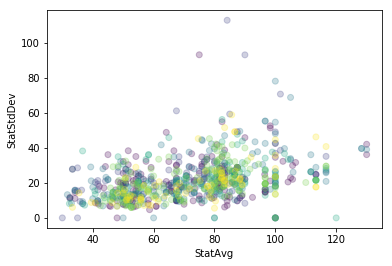

In [21]:
#Scatterplot showing the relationship between stat average and stat standard deviation.  The color is separated by Generation and can be changed to group by other numeric data points.
plt.scatter(pokemon.StatAvg, pokemon.StatStdDev, c = pokemon.Generation, alpha = .25)
plt.xlabel('StatAvg')
plt.ylabel('StatStdDev')

# Filtering
Next I just want to filter the dataframe to focus in on the Stat_Score metadata that was just created. Here I can call the data sorted to show the "best" Pokemon based on Stat_Score.

After sorting, I can also dig deeper and check how each Generation of Pokemon compares according to Stat_Score.  For this comparison I'll use both a bar chart and pivot table.

In [22]:
#Filter Pokemon dataframe to only show columns in the list.
pokemonsort = pokemon.filter(["Name","Type1", "Type2", "Generation", "Stat_Score"], axis = 1)

In [23]:
#Sorting values on stat_score to show the "best" Pokemon.
pokemonsort = pokemonsort.sort_values("Stat_Score", ascending = False)
pokemonsort

,Name,Type1,Type2,Generation,Stat_Score
164,MewtwoMega Mewtwo Y,Psychic,NaN,1,11.409892
163,MewtwoMega Mewtwo X,Psychic,Fighting,1,11.319073
426,RayquazaMega Rayquaza,Dragon,Flying,3,11.250171
422,KyogrePrimal Kyogre,Water,NaN,3,11.105052
424,GroudonPrimal Groudon,Ground,Fire,3,10.841778
552,Arceus,Normal,NaN,4,9.686536
712,KyuremWhite Kyurem,Dragon,Ice,5,8.868848
418,LatiasMega Latias,Dragon,Psychic,3,8.848431
711,KyuremBlack Kyurem,Dragon,Ice,5,8.842647
268,TyranitarMega Tyranitar,Rock,Dark,2,8.770242


In [24]:
#Pivot table showing the mean and standard deviation of each generations stat score.  Added on is the count of unique values, showing the count of Pokemon.
pd.pivot_table(pokemonsort, ['Stat_Score'], ['Generation'], aggfunc = [np.mean, np.std, len]).style.background_gradient(cmap = "coolwarm")

,mean,std,len
,Stat_Score,Stat_Score,Stat_Score
Generation,,,
1,-0.286699,3.89141,166
2,-0.514126,4.04613,106
3,0.00314467,4.53017,160
4,0.811855,3.99245,121
5,-0.0010303,3.63145,165
6,0.0429494,3.84533,82


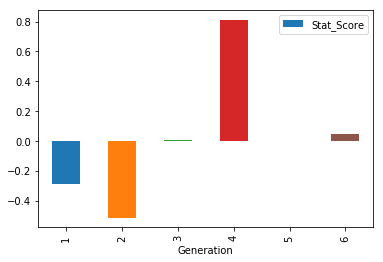

In [25]:
#This is an additional bar chart view of the stat score mean by generation.  Here it's easy to see a huge difference between generation 2 and generation 4.
pokemonsort.groupby('Generation').mean().plot(kind = 'bar', y = 'Stat_Score')

In [26]:
#Creating a new dataframe for just generation 1 Pokemon.
generation1 = pokemonsort.loc[pokemonsort["Generation"] == 1]

In [27]:
#Filtering out mega Pokemon on the generation 1 dataframe. They aren't truly generation 1 Pokemon.
generation1 = generation1[~generation1["Name"].str.contains("Mega") == True]

In [28]:
#Calling the generation1 dataframe to see the filtering.
generation1

,Name,Type1,Type2,Generation,Stat_Score
162,Mewtwo,Psychic,NaN,1,8.172313
165,Mew,Psychic,NaN,1,5.625089
161,Dragonite,Dragon,Flying,1,5.471498
156,Articuno,Ice,Flying,1,5.000309
157,Zapdos,Electric,Flying,1,4.848526
158,Moltres,Fire,Flying,1,4.793149
155,Snorlax,Normal,NaN,1,4.040514
64,Arcanine,Fire,NaN,1,4.008453
142,Lapras,Water,Ice,1,3.680725
140,Gyarados,Water,Flying,1,3.648632


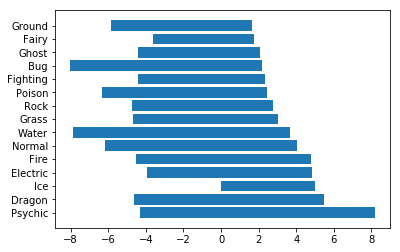

In [29]:
#Horizontal bar chart to show the stat score distribution by Type1.
plt.barh(generation1.Type1,generation1.Stat_Score)
plt.label = np.mean(generation1.Stat_Score)

# Machine Learning
The most important thing I want to do with this Pokemon data set is to utilize the stat values as predictors for Type.  For this I will create a new dataframe with just the stat values, then using sklearn functions I will split out the variables and build a predictive function.  To use the function you simply insert each stat value as an array and the model will predict what Type1 that Pokemon should be.  After building the model, tests can be run to quantify the accuracy.  Finally I want to have this function be reusable in an exterior file using joblib load and dump.  This way the function/model can be called at anytime without having to be retrained

In [31]:
#This is going to be the machine learning dataframe that we utilize to preict Type1 based on stats inputed.
pokemon_ml = pokemon.filter(["HP", "Attack", "Defense", "Sp_Attack", "Sp_Def", "Speed","Type1"], axis = 1)
pokemon_ml

,HP,Attack,Defense,Sp_Attack,Sp_Def,Speed,Type1
0,45,49,49,65,65,45,Grass
1,60,62,63,80,80,60,Grass
2,80,82,83,100,100,80,Grass
3,80,100,123,122,120,80,Grass
4,39,52,43,60,50,65,Fire
5,58,64,58,80,65,80,Fire
6,78,84,78,109,85,100,Fire
7,78,130,111,130,85,100,Fire
8,78,104,78,159,115,100,Fire
9,44,48,65,50,64,43,Water


In [32]:
#Splitting our machine learning dataframe out to predict Type1 given HP, Attack, Defense, Sp_Attack, Sp_Defense, and Speed.
X = pokemon_ml.drop(columns = ['Type1'])
y = pokemon_ml['Type1']

model = DecisionTreeClassifier()
model.fit(X, y)
model.predict([[50, 50, 50, 50, 50, 50]])

array(['Ice'], dtype=object)

In [33]:
#Next I want to figure out the accuracy of machine learning model.  Running this test many times gives a score between ~.95 and 1.0.  20% of the data is used for training the predictive model.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)
predictions = model.predict(X_test)


score = accuracy_score(y_test, predictions)
score

0.99375

In [34]:
#This joblib object is being used to save and load models.  Here it's used to save our Type1 prediction model as another file.  This file can then be called later without having to re-train.
model = joblib.dump(model, 'type_predictor.joblib')
model = joblib.load('type_predictor.joblib')
predictions = model.predict([[100, 80, 85, 50, 75, 120]])
predictions

array(['Normal'], dtype=object)

# Pokedex
The last little function I want to create is a simple Pokedex function.  Visually this won't be exciting, but it will be useful for calling out a Pokemon individually to quickly see their stats.

In [44]:
#Pokedex search function.  Enter Pokemon name into the pokedex('___') and it will return the stat values for that Pokemon.
def pokedex(Name):
    return pokemon.loc[pokemon.Name == Name, ('#', 'Name', 'Type1', 'Type2', 'Total', 'HP', 'Attack', 'Defense', 'Sp_Attack', 'Sp_Def', 'Speed', 'Stat_Score',
                                              'StatAvg', 'StatStdDev', 'TopStat', 'BottomStat')]
pokedex('Bulbasaur')

,#,Name,Type1,Type2,Total,HP,Attack,Defense,Sp_Attack,Sp_Def,Speed,Stat_Score,StatAvg,StatStdDev,TopStat,BottomStat
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,-3.961508,53.0,9.465728,Sp_Attack,HP
